# Fake News Detection Supervised Learning and Neural Networks



In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


### importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.linear_model import SGDClassifier, LogisticRegression
from keras.utils import plot_model
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics

In [4]:
from keras.layers import Embedding
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras.layers.normalization import BatchNormalization

In [5]:
train_data=pd.read_csv('/content/drive/MyDrive/cleaned_data.csv', index_col=0)

In [6]:
test_data=pd.read_csv('/content/drive/MyDrive/cleanedTest_data.csv', index_col=0)

In [7]:
train_data.head(3)

,speaker,statement,paragraph_based_content,fullText_based_content,label_fnn,source,polarity,length
0,Joe Wilkinson,national organization say georgia one america ...,coalition government watchdog group last week ...,coalition government watchdog group last week ...,fake,www.ajc.com,-0.027052,409
1,Rick Scott,say barack obama health care law big job kille...,supreme court justice embark three day oral ar...,supreme court justice embark three day oral ar...,fake,www.youtube.com,-0.062596,571
2,J.D. Alexander,say southwest florida water management distric...,new one senate budget committee chairman say w...,new one senate budget committee chairman say w...,fake,www.tampabay.com,0.037204,444


In [8]:
test_data.head(3)

,speaker,statement,paragraph_based_content,fullText_based_content,label_fnn,source
0,Jon Kyl,president obama attempt filibuster justice ali...,supreme court justice john paul stevens announ...,supreme court justice john paul stevens announ...,real,abcnews.go.com
1,Michael Steele,hawaii history throw incumbent office,abc week chairman republican democratic nation...,abc week chairman republican democratic nation...,real,www.starbulletin.com
2,John Boehner,national debt track exceed size entire economy...,ever since barack obama become president begin...,ever since barack obama become president begin...,real,www.desmoinesregister.com


In [9]:
train_data.drop(columns=['polarity', 'length'], inplace=True)

In [10]:
vocab_size=500
embedding_vector=10

### Model building on column statement for further comparison

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# data vectorizer
vectorizer = CountVectorizer(analyzer = "word", 
                             binary = True, 
                             min_df =2,
                             stop_words='english')
array_sentence = vectorizer.fit_transform(train_data['statement']).toarray()
training_data = pd.DataFrame(array_sentence, columns=vectorizer.get_feature_names())

In [12]:
train_data.shape

(15212, 6)

In [13]:
training_data.shape

(15212, 6623)

In [14]:
labels=train_data['label_fnn']

In [15]:
train_data['label_fnn'].replace({'fake': 0, 'real': 1}, inplace=True)

### Splitting the data into train and test data.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, labels, test_size=.2)

### Applying MultinomialNB to test out the suitability of descrete features in data.

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
y_predict_train = model.predict(X_train)
train_acc = accuracy_score(y_train,y_predict_train)
    
    # testing error
y_predict_test = model.predict(X_test)
test_acc = accuracy_score(y_test,y_predict_test)

In [19]:
print("Training Accuracy: {:.2f}%".format(train_acc*100))
print("Testing Accuracy: {:.2f}%".format(test_acc*100))

Training Accuracy: 73.76%
Testing Accuracy: 63.19%


### Using different datasets, train_data for training and for test_data for testing.

### Here I will be testing the accuracy for Linear, Logistic regression, Decision Tree and MultinomialNB and later compare the accuracy of each model.

In [20]:
test_data['label_fnn'].replace({'fake': 0, 'real': 1}, inplace=True)

### LinearSVC

In [ ]:
pipeline_Linear = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC())
    ])
fit = pipeline_Linear.fit(train_data['statement'],train_data['label_fnn'])

In [ ]:
pred=pipeline_Linear.predict(test_data['statement'])

### Accuracy of LinearSVC 

In [ ]:
print("Accuracy : ",accuracy_score(pred,test_data['label_fnn']))
acc_linear=accuracy_score(pred,test_data['label_fnn'])*100

Accuracy :  0.6736242884250474


In [ ]:
confusion = metrics.confusion_matrix(test_data['label_fnn'], pred)

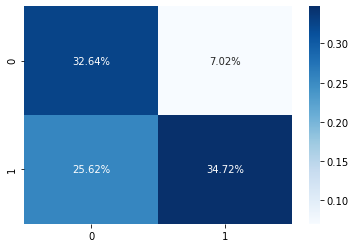

In [ ]:
sns.heatmap(confusion/np.sum(confusion), annot=True, 
            fmt='.2%', cmap='Blues')

### Logistic Regression

In [ ]:
pipeline_Logistic = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        (('c', LogisticRegression()))
    ])
fit = pipeline_Logistic.fit(train_data['statement'],train_data['label_fnn'])

In [ ]:
pred_logistic=pipeline_Logistic.predict(test_data['statement'])

### Accuracy of Logistic Regression

In [ ]:
print("Accuracy : ",accuracy_score(pred_logistic,test_data['label_fnn']))
acc_logistic=accuracy_score(pred_logistic,test_data['label_fnn'])*100

Accuracy :  0.683111954459203


### Confusion matrix of Logistic Regression

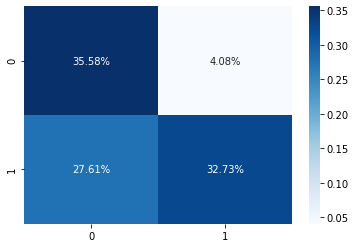

In [ ]:
confusion_logistic = metrics.confusion_matrix(test_data['label_fnn'], pred_logistic)
sns.heatmap(confusion_logistic/np.sum(confusion_logistic), annot=True, 
            fmt='.2%', cmap='Blues')

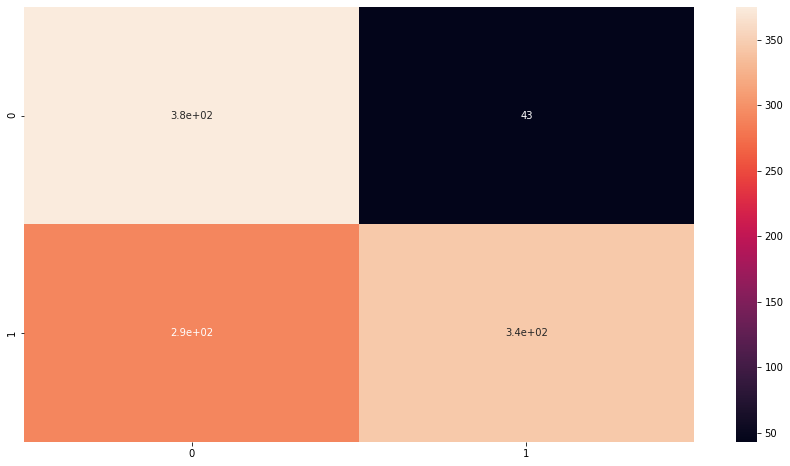

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(confusion_logistic, annot=True)

### Decision Tree

In [ ]:
pipeline_decisiontree = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline_decisiontree.fit(train_data['statement'],train_data['label_fnn'])

In [ ]:
pred_tree=pipeline_decisiontree.predict(test_data['statement'])

### Accuracy

In [ ]:
print("Accuracy : ",accuracy_score(pred_tree,test_data['label_fnn']))
acc_tree=accuracy_score(pred_tree,test_data['label_fnn'])*100

Accuracy :  0.6110056925996205


### Confusion matrix of Decision Tree

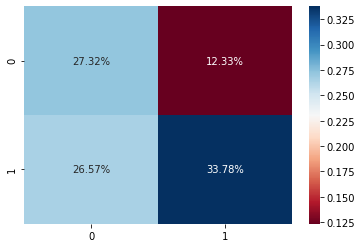

In [ ]:
confusion_tree = metrics.confusion_matrix(test_data['label_fnn'], pred_tree)
sns.heatmap(confusion_tree/np.sum(confusion_tree), annot=True, 
            fmt='.2%', cmap='RdBu')

### MultinomialNB

In [ ]:
pipeline_Multinomial = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', MultinomialNB())
    ])
fit = pipeline_Multinomial.fit(train_data['statement'],train_data['label_fnn'])

In [ ]:
pred_multinomial=pipeline_Multinomial.predict(test_data['statement'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_multinomial,test_data['label_fnn']))
acc_multinomial=accuracy_score(pred_multinomial,test_data['label_fnn'])*100

Accuracy :  0.7182163187855788


### Confusion matrix of MultinomialNB

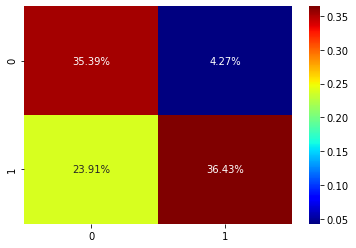

In [ ]:
confusion_multinomial = metrics.confusion_matrix(test_data['label_fnn'], pred_multinomial)
sns.heatmap(confusion_multinomial/np.sum(confusion_multinomial), annot=True, 
            fmt='.2%', cmap='jet')

In [ ]:
#make dataset here

accuracy_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_linear, acc_logistic, acc_tree, acc_multinomial]}
  
# Create DataFrame
df_statement_accuracy = pd.DataFrame(accuracy_data)

### comparing all the accuracies

In [ ]:
df_statement_accuracy

,Supervised ML Models,Accuracy
0,Linear Regression,67.362429
1,Logistic Regression,68.311195
2,Decision Tree,61.100569
3,Multinomial,71.821632


### Bar graph shows Decision tree has the lowest accuracy and MultinomialNB has the highest accuracy which explains it did good job in validating descrete features.

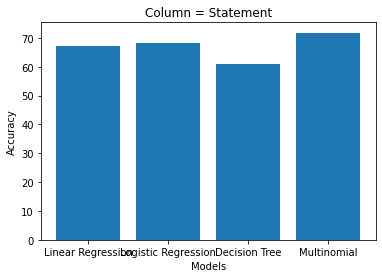

In [ ]:
plt.bar(df_statement_accuracy['Supervised ML Models'], df_statement_accuracy['Accuracy'])
plt.title('Column = Statement')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Model building on column paragraph_based_content for further comparison

In [ ]:
fit = pipeline_Linear.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [ ]:
pred_para=pipeline_Linear.predict(test_data['paragraph_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_para,test_data['label_fnn']))
acc_para_linear=accuracy_score(pred_para,test_data['label_fnn'])*100

Accuracy :  0.8036053130929791


### repeating the steps for each column namely, paragraph based and full text based from the original training data.

In [ ]:
fit = pipeline_Logistic.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [ ]:
pred_logistic_para=pipeline_Logistic.predict(test_data['paragraph_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_logistic_para,test_data['label_fnn']))
acc_para_logistic=accuracy_score(pred_logistic_para,test_data['label_fnn'])*100

Accuracy :  0.8045540796963947


In [ ]:
fit = pipeline_decisiontree.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [ ]:
pred_tree_para=pipeline_decisiontree.predict(test_data['paragraph_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_tree_para,test_data['label_fnn']))
acc_para_tree=accuracy_score(pred_tree_para,test_data['label_fnn'])*100

Accuracy :  0.6783681214421252


In [ ]:
fit = pipeline_Multinomial.fit(train_data['paragraph_based_content'],train_data['label_fnn'])

In [ ]:
pred_multinomial_para=pipeline_Multinomial.predict(test_data['paragraph_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_multinomial_para,test_data['label_fnn']))
acc_para_multinomial=accuracy_score(pred_multinomial_para,test_data['label_fnn'])*100

Accuracy :  0.7590132827324478


In [ ]:
#make dataset here

accuracy_para_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_para_linear, acc_para_logistic, acc_para_tree, acc_para_multinomial]}
  
# Create DataFrame
df_para_accuracy = pd.DataFrame(accuracy_para_data)

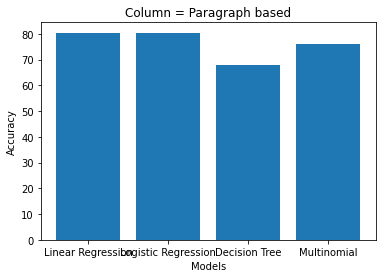

In [ ]:
plt.bar(df_para_accuracy['Supervised ML Models'], df_para_accuracy['Accuracy'])
plt.title('Column = Paragraph based')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Model building on column fullText_based_content for further comparison

In [ ]:
fit = pipeline_Linear.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [ ]:
pred_fullText=pipeline_Linear.predict(test_data['fullText_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_fullText,test_data['label_fnn']))
acc_fullText_Linear=accuracy_score(pred_fullText,test_data['label_fnn'])*100

Accuracy :  0.8026565464895635


In [ ]:
fit = pipeline_Logistic.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [ ]:
pred_logistic_fullText=pipeline_Logistic.predict(test_data['fullText_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_logistic_fullText,test_data['label_fnn']))
acc_fullText_logistic=accuracy_score(pred_logistic_fullText,test_data['label_fnn'])*100

Accuracy :  0.8045540796963947


In [ ]:
fit = pipeline_decisiontree.fit(train_data['fullText_based_content'],train_data['label_fnn'])

In [ ]:
pred_tree_fullText=pipeline_decisiontree.predict(test_data['fullText_based_content'])

In [ ]:
print("Accuracy : ",accuracy_score(pred_tree_fullText,test_data['label_fnn']))
acc_fullText_tree=accuracy_score(pred_tree_fullText,test_data['label_fnn'])*100

Accuracy :  0.6821631878557874


In [ ]:
fit = pipeline_Multinomial.fit(train_data['fullText_based_content'],train_data['label_fnn'])
pred_multinomial_fullText=pipeline_Multinomial.predict(test_data['fullText_based_content'])
print("Accuracy : ",accuracy_score(pred_multinomial_fullText,test_data['label_fnn']))

Accuracy :  0.7590132827324478


In [ ]:
acc_fullText_multinomial=accuracy_score(pred_multinomial_fullText,test_data['label_fnn'])*100

In [ ]:
#make dataset here

accuracy_fullText_data = {'Supervised ML Models':['Linear Regression', 'Logistic Regression', 'Decision Tree', 'Multinomial'],
        'Accuracy':[acc_fullText_Linear, acc_fullText_logistic, acc_fullText_tree, acc_fullText_multinomial]}
  
# Create DataFrame
df_fullText_accuracy = pd.DataFrame(accuracy_fullText_data)

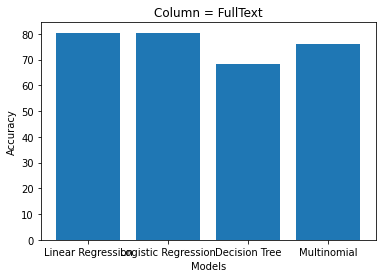

In [ ]:
plt.bar(df_fullText_accuracy['Supervised ML Models'], df_fullText_accuracy['Accuracy'])
plt.title('Column = FullText')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()

### Comparing all the models tested on 3 columns namely, statement, paragraph based reviews and full text based reviews to compare which type of data performed the best. All the models performed good for both paragraph based and full text based but decision tree performed a little less on paragraph based text. 

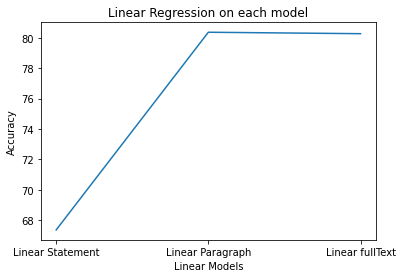

In [ ]:
linearity=['Linear Statement', 'Linear Paragraph', 'Linear fullText']
accuracy_linearity=[acc_linear, acc_para_linear, acc_fullText_Linear]
plt.plot(linearity, accuracy_linearity)
plt.title('Linear Regression on each model')
plt.xlabel('Linear Models')
plt.ylabel('Accuracy')
plt.show()

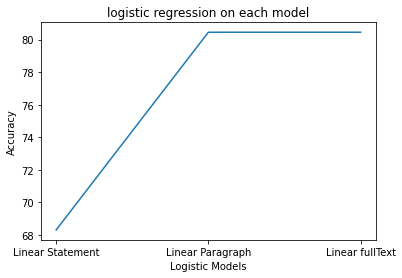

In [ ]:
logistics=['Logistic Statement', 'Logistic Paragraph', 'Logistic fullText']
accuracy_logistics=[acc_logistic, acc_para_logistic, acc_fullText_logistic]
plt.plot(linearity, accuracy_logistics)
plt.title('logistic regression on each model')
plt.xlabel('Logistic Models')
plt.ylabel('Accuracy')
plt.show()

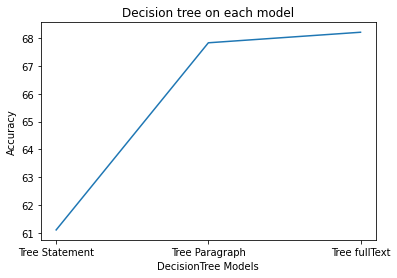

In [ ]:
tree=['Tree Statement', 'Tree Paragraph', 'Tree fullText']
accuracy_tree=[acc_tree, acc_para_tree, acc_fullText_tree]
plt.plot(tree, accuracy_tree)
plt.title('Decision tree on each model')
plt.xlabel('DecisionTree Models')
plt.ylabel('Accuracy')
plt.show()

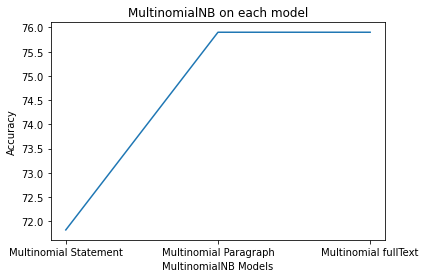

In [ ]:
multinomialNB=['Multinomial Statement', 'Multinomial Paragraph', 'Multinomial fullText']
accuracy_multinomialNB=[acc_multinomial, acc_para_multinomial, acc_fullText_multinomial]
plt.plot(multinomialNB, accuracy_multinomialNB)
plt.title('MultinomialNB on each model')
plt.xlabel('MultinomialNB Models')
plt.ylabel('Accuracy')
plt.show()

### Neural Networks

In [16]:
max_sequence = 5000
MAX_WORDS = 25000
dimensions = 300
TEST_SPLIT = 0.2

In [17]:
labels=train_data['label_fnn']

#### refering to the specified link for tokenizing the statement column for Neural Networks.
https://github.com/lutzhamel/fake-news/blob/master/fake-news-classification.ipynb

In [18]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(train_data['statement'])
sequences = tokenizer.texts_to_sequences(train_data['statement'])

word_index = tokenizer.word_index
num_words = min(MAX_WORDS, len(word_index)) + 1
data = pad_sequences(sequences, 
                     maxlen=max_sequence, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 11646 unique tokens.
Shape of data tensor: (15212, 5000)
Shape of label tensor: (15212,)


### Building the first model with one convolution layer, one maxpooling and 2 dense layers.

https://github.com/lutzhamel/fake-news/blob/master/fake-news-classification.ipynb

In [19]:
from keras import layers
from keras.models import Sequential

model = Sequential(
    [
       
        layers.Embedding(num_words,
                         dimensions, 
                         input_length=max_sequence,
                         trainable=True),
        layers.Conv1D(128, 5, activation='relu'),
        layers.GlobalMaxPooling1D(),
        
       
        layers.Dense(128, activation='relu'),
        
        layers.Dense(1, activation='sigmoid')
    ])

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 300)         3494100   
_________________________________________________________________
conv1d (Conv1D)              (None, 4996, 128)         192128    
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 3,702,869
Trainable params: 3,702,869
Non-trainable params: 0
_________________________________________________________________


In [20]:
 from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(data, 
                                                  labels,
                                                  test_size=TEST_SPLIT)

### fitting the model using 64 as batch size.

In [57]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(x_val, y_val))

Epoch 1/5
191/191 [==============================] - 79s 412ms/step - loss: 0.3880 - accuracy: 0.8357 - val_loss: 0.8806 - val_accuracy: 0.5800
Epoch 2/5
191/191 [==============================] - 79s 411ms/step - loss: 0.1164 - accuracy: 0.9675 - val_loss: 1.1792 - val_accuracy: 0.5685
Epoch 3/5
191/191 [==============================] - 78s 410ms/step - loss: 0.0257 - accuracy: 0.9937 - val_loss: 1.5665 - val_accuracy: 0.5820
Epoch 4/5
191/191 [==============================] - 78s 410ms/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 1.5621 - val_accuracy: 0.5905
Epoch 5/5
191/191 [==============================] - 78s 409ms/step - loss: 0.0059 - accuracy: 0.9987 - val_loss: 1.9126 - val_accuracy: 0.5984


### fiiting the second model with 128 batch size

In [ ]:
history = model.fit(x_train, 
                    y_train,
                    batch_size=128,
                    epochs=5,
                    validation_data=(x_val, y_val))

Epoch 1/5
96/96 [==============================] - 58s 583ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 1.4575 - val_accuracy: 0.6214
Epoch 2/5
96/96 [==============================] - 55s 578ms/step - loss: 9.0356e-04 - accuracy: 0.9999 - val_loss: 1.7901 - val_accuracy: 0.6188
Epoch 3/5
96/96 [==============================] - 55s 577ms/step - loss: 3.6118e-04 - accuracy: 0.9999 - val_loss: 1.8051 - val_accuracy: 0.6221
Epoch 4/5
96/96 [==============================] - 55s 578ms/step - loss: 8.8413e-05 - accuracy: 1.0000 - val_loss: 1.9134 - val_accuracy: 0.6178
Epoch 5/5
96/96 [==============================] - 55s 578ms/step - loss: 2.9843e-04 - accuracy: 0.9998 - val_loss: 2.0889 - val_accuracy: 0.6122


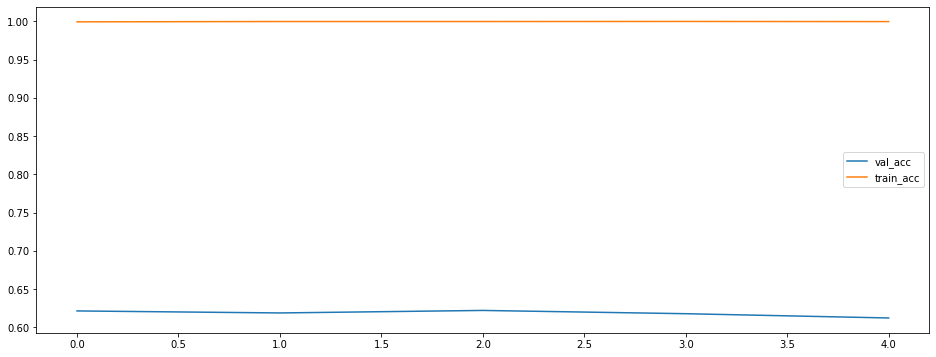

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()

### splotting training and validation accuracies through 5 *epochs*

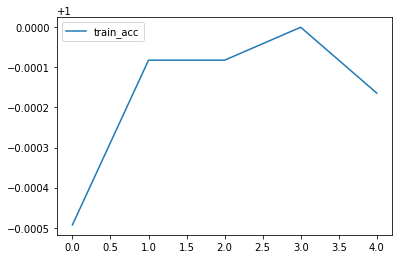

In [ ]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()

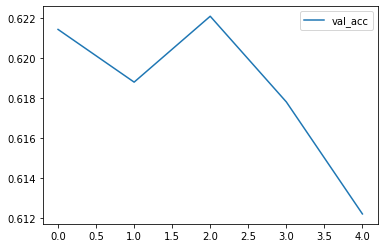

In [ ]:
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

### Combining and shuffling train and test datasets for better results

Step 1: merging training and testing data

In [21]:
combined_df=pd.concat([train_data, test_data], ignore_index=True)

In [22]:
combined_df.shape

(16266, 6)

In [23]:
labels_combined=combined_df['label_fnn']

In [46]:
combined_df['label_fnn'].replace({'fake': 0, 'real': 1}, inplace=True)

In [47]:
combined_df.head(4)

,speaker,statement,paragraph_based_content,fullText_based_content,label_fnn,source
0,Joe Wilkinson,national organization say georgia one america ...,coalition government watchdog group last week ...,coalition government watchdog group last week ...,0,www.ajc.com
1,Rick Scott,say barack obama health care law big job kille...,supreme court justice embark three day oral ar...,supreme court justice embark three day oral ar...,0,www.youtube.com
2,J.D. Alexander,say southwest florida water management distric...,new one senate budget committee chairman say w...,new one senate budget committee chairman say w...,0,www.tampabay.com
3,Paul Ryan,congressional budget office economic model mea...,recently house budget chairman paul ryan wi al...,recently house budget chairman paul ryan wi al...,1,www.cnn.com


In [24]:
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPool2D
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.models import Model
from sklearn.model_selection import train_test_split

https://github.com/AIRLegend/fakenews/blob/master/notebooks/Train_Colab_Binary.ipynb

In [48]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(combined_df['statement'])
sequences = tokenizer.texts_to_sequences(combined_df['statement'])

word_index = tokenizer.word_index
num_words = min(MAX_WORDS, len(word_index)) + 1
data_combined = pad_sequences(sequences, 
                     maxlen=max_sequence, 
                     padding='pre', 
                     truncating='pre')

print('Found %s unique tokens.' % len(word_index))
print('Shape of data tensor:', data_combined.shape)
print('Shape of label tensor:', labels_combined.shape)

Found 12043 unique tokens.
Shape of data tensor: (16266, 5000)
Shape of label tensor: (16266,)


### splitting the combined data into train, test data

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(data_combined, 
                                                  labels_combined,
                                                  test_size=TEST_SPLIT)

In [27]:
##ytrain = np.asarray(ytrain).astype('float32').reshape((-1,1))
##ytest = np.asarray(ytest).astype('float32').reshape((-1,1))

In [36]:
print(xtrain.shape)
print(ytrain.shape)

(13012, 5000)
(13012,)


### Building first LSTM model with 2 convolution layers, 2 maxpooling layers, one LSTM and 4 dense layers.

#### refering the model from provided link
https://github.com/LeadingIndiaAI/-Fake-News-Detection-/blob/master/LSTM-Conv.ipynb

In [50]:
model_LSTM = Sequential(
    [
        
        layers.Embedding(num_words,
                         dimensions, 
                         input_length=max_sequence,
                         trainable=True),
        layers.Dropout(0.2),
        layers.Conv1D(filters=32, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='softmax')
    ])

model_LSTM.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 5000, 300)         3613200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 5000, 300)         0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 5000, 32)          48032     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 2500, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 2500, 64)          6208      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 1250, 64)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)              

In [51]:
ytrain.shape

(13012,)

In [ ]:
import numpy as np

X = np.asarray(xtrain).astype(np.float32)

In [54]:
history = model_LSTM.fit(X, 
                    ytrain,
                    batch_size=64,
                    epochs=4,
                    validation_data=(xtest, ytest))

Epoch 1/4
204/204 [==============================] - 1303s 6s/step - loss: 0.6942 - accuracy: 0.4993 - val_loss: 0.6930 - val_accuracy: 0.5037
Epoch 2/4
204/204 [==============================] - 1224s 6s/step - loss: 0.6909 - accuracy: 0.5028 - val_loss: 0.6932 - val_accuracy: 0.5037
Epoch 3/4
204/204 [==============================] - 1181s 6s/step - loss: 0.6159 - accuracy: 0.5083 - val_loss: 0.7374 - val_accuracy: 0.5037
Epoch 4/4
204/204 [==============================] - 1188s 6s/step - loss: 0.3793 - accuracy: 0.4966 - val_loss: 1.2233 - val_accuracy: 0.5037


### plotting validation accuracy vs training validation.

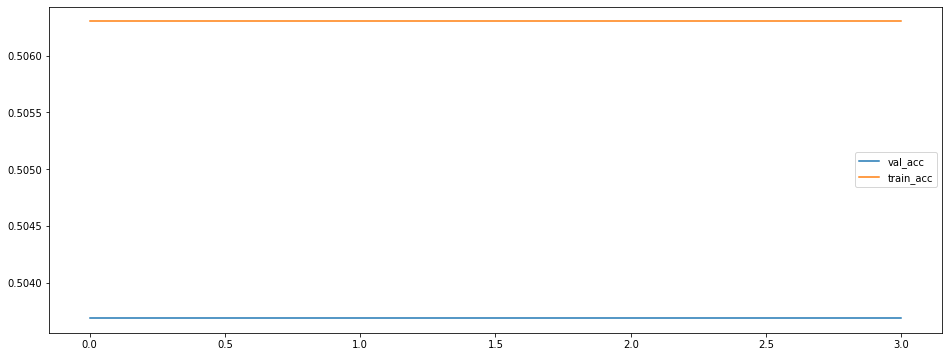

In [55]:
plt.figure(figsize=(16,6))
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()

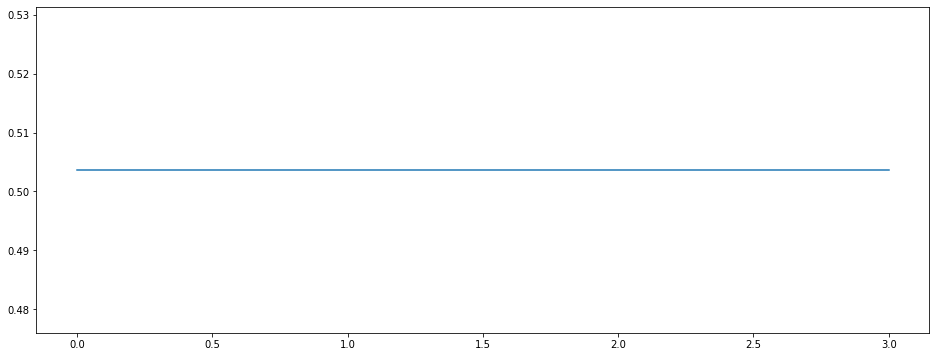

In [56]:
plt.figure(figsize=(16,6))
plt.plot(history.history['val_accuracy'], label='val_acc')

In [ ]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend()

In [ ]:
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

### Building second LSTM model with 1 convolution layer, 1 maxpooling layers, 3 batchnormalization layers, 3 LSTMs and 4 dense layers.

In [ ]:
model_more_LSTM = Sequential(
    [
      
        layers.Embedding(num_words,
                         dimensions, 
                         input_length=max_sequence,
                         trainable=True),
        
        layers.Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'),
        layers.MaxPooling1D(pool_size=2),
        layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
        
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
        
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='softmax')
    ])

model_more_LSTM.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_more_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5000, 300)         3613200   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 5000, 64)          96064     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2500, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 2500, 128)         98816     
_________________________________________________________________
batch_normalization_1 (Batch (None, 2500, 128)         512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 2500, 128)         0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 2500, 128)        

In [ ]:
model_more_LSTM.fit(xtrain, 
                    ytrain,
                    batch_size=64,
                    epochs=2)

Epoch 1/2
204/204 [==============================] - 5094s 25s/step - loss: 0.6948 - accuracy: 0.5061
Epoch 2/2
204/204 [==============================] - 4964s 24s/step - loss: 0.6638 - accuracy: 0.5061
